# Fashion MNIST Image Classification

## Dataset

- Source: [Fashion MNIST on Kaggle](https://www.kaggle.com/datasets/zalando-research/fashion-mnist)
- CSV Files:
  - `fashion-mnist_train.csv` 
  - `fashion-mnist_test.csv` 

## Objectives

- Build multiple classifiers including **MLPClassifier**, **KNN**, **Logistic Regression**, **Decision Tree**, and **SVC**
- Tune hyperparameters using `RandomizedSearchCV`
- Use evaluation metrics like Accuracy, F1-Score, and Confusion Matrix
- Select the best-performing model for multi-class classification

## Metrics Used

- Accuracy Score
- Confusion Matrix (visualized)
- Classification Report (Precision, Recall, F1-score)

## Tech Stack

- Python
- scikit-learn
- pandas
- matplotlib / seaborn
- Jupyter Notebook



## Load Fashion MNIST CSV Files

We begin by loading the training and testing datasets using pandas. Each dataset contains grayscale images of clothing items in flattened format (28×28 = 784 pixels). The first column is the label (0–9), and the remaining columns are pixel values ranging from 0 to 255.

In [4]:
import pandas as pd

test_df = pd.read_csv("fashion-mnist_test.csv")

# View the shape and first few rows
print("Test Data Shape:", test_df.shape)
test_df.head()

Test Data Shape: (10000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Separate Features and Labels from the Test Set

In this step, we split the test dataset into:
- **X_test**: the feature matrix containing 784 pixel columns
- **y_test**: the target labels (0 to 9) from the 'label' column

This separation is essential to evaluate the model's performance later using truly unseen test data.


In [5]:
# Separate features (pixel values) and target (labels) from test data
X_test = test_df.drop("label", axis=1)
y_test = test_df["label"]

# Confirm shapes
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_test shape: (10000, 784)
y_test shape: (10000,)


## Load and Split the Training Set

Now we load the training dataset `fashion-mnist_train.csv`, which contains 60,000 grayscale clothing images. Similar to the test set, the first column is the label (0–9), and the remaining 784 columns are pixel intensities.

We'll split the training data into:
- `X_train`: the 784 pixel features
- `y_train`: the label column (our target)

In [6]:
# Load the training dataset
train_df = pd.read_csv("fashion-mnist_train.csv")

# Show shape and preview
print("Train Data Shape:", train_df.shape)
train_df.head()

Train Data Shape: (60000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Split features and labels for training set
X_train = train_df.drop("label", axis=1)
y_train = train_df["label"]

# Confirm shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (60000, 784)
y_train shape: (60000,)


## Data Exploration and Visualization

In this section, we explore the training data by:
- Checking data types and missing values
- Analyzing the distribution of clothing categories
- Visualizing sample images from the dataset by reshaping the 784-pixel rows back into 28×28 grayscale images

In [8]:
# Check data types and null values
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [9]:
# Count of each class label in training data
label_counts = train_df['label'].value_counts().sort_index()

print("Class distribution in training set:\n")
print(label_counts)


Class distribution in training set:

label
0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: count, dtype: int64


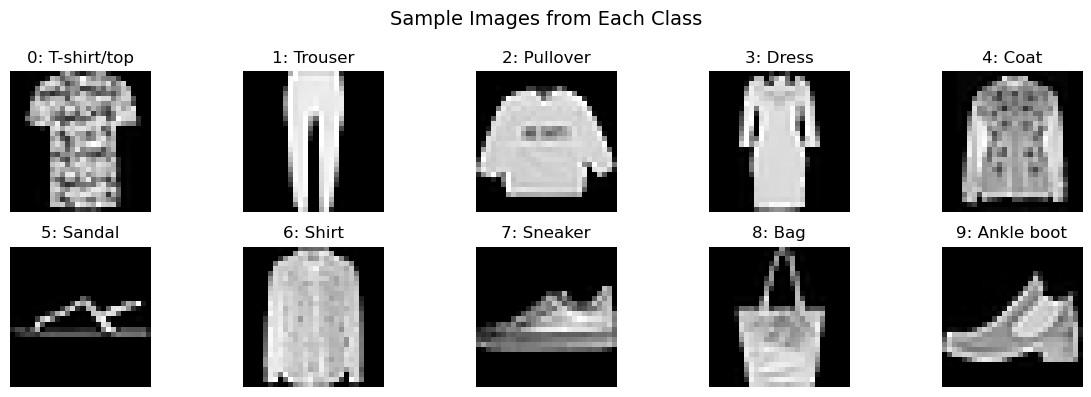

In [10]:
import matplotlib.pyplot as plt

# Define class names
class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

# Plot 10 sample images (1 per class)
plt.figure(figsize=(12, 4))
for i in range(10):
    img = X_train[y_train == i].iloc[0].values.reshape(28, 28)  # First image of class i
    plt.subplot(2, 5, i+1)
    plt.imshow(img, cmap="gray")
    plt.title(f"{i}: {class_names[i]}")
    plt.axis("off")

plt.suptitle("Sample Images from Each Class", fontsize=14)
plt.tight_layout()
plt.show()


## Normalize Pixel Values using MinMaxScaler

Pixel values currently range from 0 to 255. To improve model performance, we'll normalize all features using `MinMaxScaler` to scale values between 0 and 1.

The scaler is fit only on the training set, and then used to transform both training and test sets to avoid data leakage.


In [11]:
from sklearn.preprocessing import MinMaxScaler

# Create scaler and fit only on training features
scaler = MinMaxScaler()
scaler.fit(X_train)

# Transform both training and test features
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Confirm the range of scaled values
print("Min value after scaling:", X_train_scaled.min())
print("Max value after scaling:", X_train_scaled.max())


Min value after scaling: 0.0
Max value after scaling: 1.0


## Implement MLPClassifier (Multi-Layer Perceptron)

We begin model implementation with `MLPClassifier`, a type of feedforward neural network from scikit-learn. This acts as our baseline deep learning model.

We'll:
- Train on scaled training data (`X_train_scaled`, `y_train`)
- Evaluate on unseen test data (`X_test_scaled`, `y_test`)
- Use accuracy, classification report, and confusion matrix for evaluation


In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay

# Create a simple baseline MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# Train the model
mlp.fit(X_train_scaled, y_train)

# Predict on test set
y_pred_mlp = mlp.predict(X_test_scaled)

# Evaluate accuracy
print("MLP Accuracy:", accuracy_score(y_test, y_pred_mlp))


MLP Accuracy: 0.886


## Baseline Comparison with Other Classifiers

To compare performance, we now implement 4 additional classification models:
- Logistic Regression
- K-Nearest Neighbors (KNN)
- Support Vector Classifier (SVC)
- Decision Tree

Each model will be trained on the scaled training data and evaluated on the test set.


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


In [15]:
# Store models and their names in a list
models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000)),
    ("KNN", KNeighborsClassifier(n_neighbors=5)),
    ("SVC", SVC()),
    ("Decision Tree", DecisionTreeClassifier())
]

# Loop through each model
for name, model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")


Logistic Regression Accuracy: 0.8522
KNN Accuracy: 0.8591
SVC Accuracy: 0.8919
Decision Tree Accuracy: 0.7965


## Baseline Evaluation – Accuracy, Classification Report, and Confusion Matrix

To ensure fair comparison with the MLPClassifier, we now evaluate each baseline model using the same metrics:
- Accuracy Score
- Classification Report (Precision, Recall, F1-Score)
- Confusion Matrix (visualized)


 Logistic Regression
 Accuracy: 0.8535

 Classification Report:

              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1000
           1       0.95      0.97      0.96      1000
           2       0.77      0.76      0.77      1000
           3       0.86      0.86      0.86      1000
           4       0.78      0.81      0.79      1000
           5       0.94      0.91      0.92      1000
           6       0.65      0.60      0.62      1000
           7       0.90      0.92      0.91      1000
           8       0.94      0.94      0.94      1000
           9       0.93      0.95      0.94      1000

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000

 Confusion Matrix:


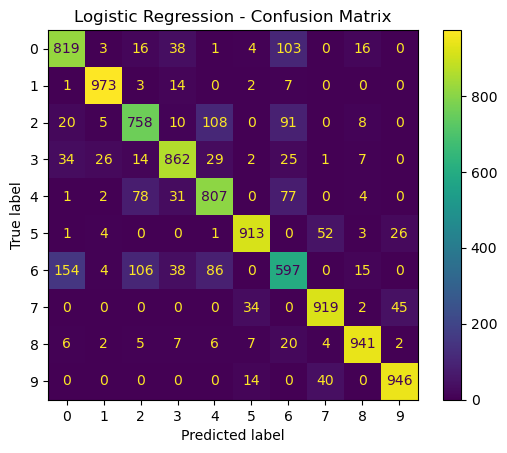

 KNN
 Accuracy: 0.8591

 Classification Report:

              precision    recall  f1-score   support

           0       0.77      0.87      0.82      1000
           1       0.99      0.96      0.98      1000
           2       0.75      0.81      0.78      1000
           3       0.91      0.88      0.90      1000
           4       0.79      0.80      0.79      1000
           5       1.00      0.82      0.90      1000
           6       0.68      0.58      0.63      1000
           7       0.87      0.94      0.91      1000
           8       0.98      0.95      0.97      1000
           9       0.88      0.96      0.92      1000

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000

 Confusion Matrix:


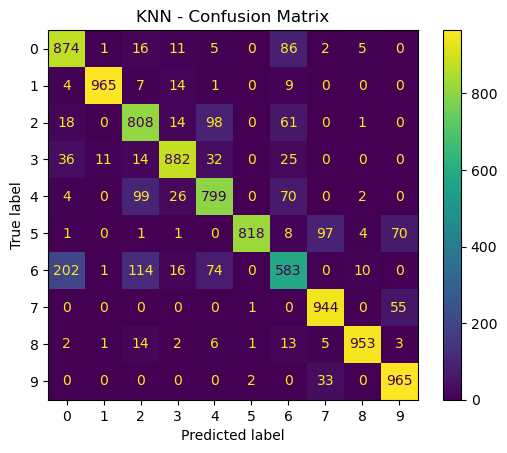

 SVC
 Accuracy: 0.8919

 Classification Report:

              precision    recall  f1-score   support

           0       0.81      0.86      0.84      1000
           1       0.99      0.97      0.98      1000
           2       0.83      0.82      0.83      1000
           3       0.89      0.92      0.90      1000
           4       0.84      0.87      0.85      1000
           5       0.96      0.94      0.95      1000
           6       0.74      0.67      0.71      1000
           7       0.92      0.94      0.93      1000
           8       0.97      0.97      0.97      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

 Confusion Matrix:


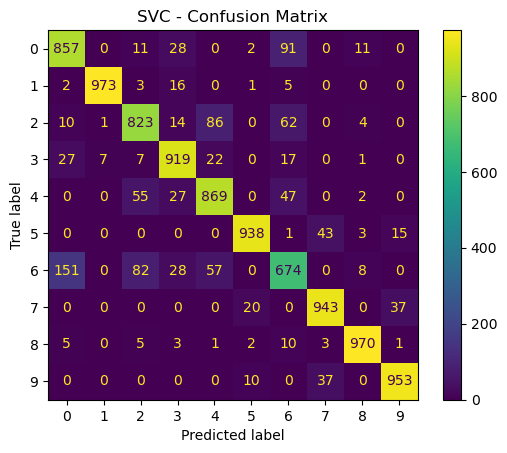

 Decision Tree
 Accuracy: 0.7976

 Classification Report:

              precision    recall  f1-score   support

           0       0.74      0.74      0.74      1000
           1       0.95      0.96      0.96      1000
           2       0.69      0.68      0.69      1000
           3       0.82      0.81      0.81      1000
           4       0.67      0.67      0.67      1000
           5       0.90      0.88      0.89      1000
           6       0.55      0.57      0.56      1000
           7       0.85      0.87      0.86      1000
           8       0.92      0.90      0.91      1000
           9       0.89      0.90      0.89      1000

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000

 Confusion Matrix:


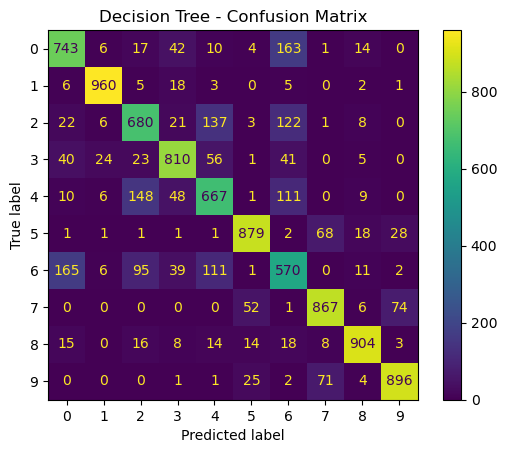

In [18]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# Models (already trained earlier)
models = [
    ("Logistic Regression", LogisticRegression(max_iter=1000, solver='saga')),
    ("KNN", KNeighborsClassifier(n_neighbors=5)),
    ("SVC", SVC()),
    ("Decision Tree", DecisionTreeClassifier())
]

# Evaluate each model
for name, model in models:
    print("="*60)
    print(f" {name}")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    print(f" Accuracy: {acc:.4f}\n")

    print(" Classification Report:\n")
    print(classification_report(y_test, y_pred))

    print(" Confusion Matrix:")
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.title(f"{name} - Confusion Matrix")
    plt.show()


## MLPClassifier – Full Evaluation

Now we evaluate the MLPClassifier using the same metrics as other models:
- Accuracy
- Classification Report
- Confusion Matrix


MLP Accuracy: 0.886

 Classification Report:

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1000
           1       0.98      0.98      0.98      1000
           2       0.75      0.83      0.79      1000
           3       0.92      0.88      0.90      1000
           4       0.84      0.79      0.82      1000
           5       0.97      0.94      0.96      1000
           6       0.73      0.70      0.71      1000
           7       0.93      0.97      0.95      1000
           8       0.96      0.96      0.96      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000


 Confusion Matrix:


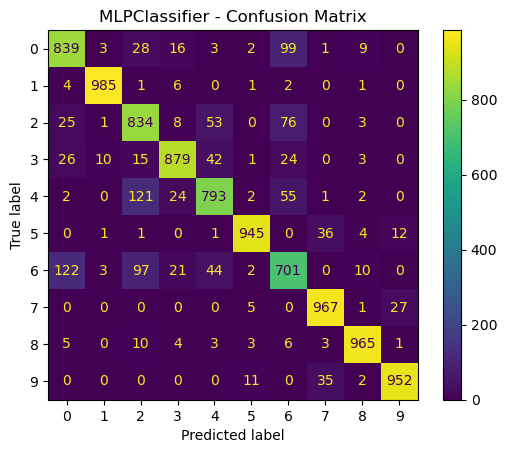

In [17]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

# MLP was already trained earlier and prediction stored in y_pred_mlp
print("MLP Accuracy:", accuracy_score(y_test, y_pred_mlp))

# Classification report
print("\n Classification Report:\n")
print(classification_report(y_test, y_pred_mlp))

# Confusion matrix
print("\n Confusion Matrix:")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_mlp)
plt.title("MLPClassifier - Confusion Matrix")
plt.show()


## Hyperparameter Tuning using RandomizedSearchCV

To improve model performance, we tune two classifiers:
- **MLPClassifier** (Multi-layer Perceptron)
- **SVC** (Support Vector Classifier)

We use `RandomizedSearchCV` with 5-fold cross-validation (`cv=5`) on the **training data only**, and evaluate the tuned models on the test set.


In [19]:
from sklearn.model_selection import RandomizedSearchCV
# Hyperparameter space for MLP
mlp_param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (100, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}


In [20]:
mlp_random_search = RandomizedSearchCV(
    estimator=MLPClassifier(max_iter=200, random_state=42),
    param_distributions=mlp_param_dist,
    n_iter=10,
    cv=5,
    verbose=1,
    n_jobs=-1
)

mlp_random_search.fit(X_train_scaled, y_train)

# Best hyperparameters
print("Best MLP Parameters:", mlp_random_search.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best MLP Parameters: {'solver': 'sgd', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100, 50), 'alpha': 0.001, 'activation': 'tanh'}


c:\Users\iamaj\miniconda3\envs\ml\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Tuned MLP Accuracy: 0.8872

 Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83      1000
           1       0.98      0.98      0.98      1000
           2       0.84      0.81      0.83      1000
           3       0.92      0.88      0.90      1000
           4       0.83      0.84      0.83      1000
           5       0.96      0.93      0.95      1000
           6       0.71      0.71      0.71      1000
           7       0.92      0.93      0.92      1000
           8       0.97      0.97      0.97      1000
           9       0.94      0.95      0.95      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



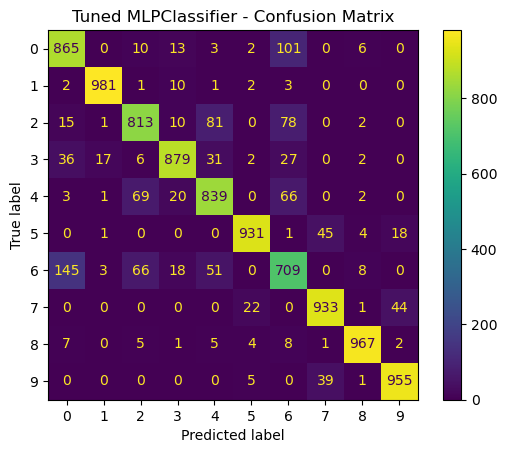

In [21]:
# Predict with best model
best_mlp = mlp_random_search.best_estimator_
y_pred_mlp_tuned = best_mlp.predict(X_test_scaled)

# Evaluate
print("Tuned MLP Accuracy:", accuracy_score(y_test, y_pred_mlp_tuned))
print("\n Classification Report:\n", classification_report(y_test, y_pred_mlp_tuned))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_mlp_tuned)
plt.title("Tuned MLPClassifier - Confusion Matrix")
plt.show()


## RandomizedSearchCV – Tuning SVC (Support Vector Classifier)

We now tune the Support Vector Classifier using `RandomizedSearchCV`. This includes hyperparameters like:
- `C` (regularization)
- `kernel` type
- `gamma` (for RBF/poly kernels)

Cross-validation is performed only on the training set.


In [22]:
from sklearn.svm import SVC

# Hyperparameter grid for SVC
svc_param_dist = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.01, 0.001]
}


In [24]:
svc_random_search = RandomizedSearchCV(
    estimator=SVC(),
    param_distributions=svc_param_dist,
    n_iter=10,
    cv=5,
    verbose=1,
    n_jobs=-1
)

svc_random_search.fit(X_train_scaled, y_train)

# Best parameters
print("Best SVC Parameters:", svc_random_search.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits


KeyboardInterrupt: 

In [ ]:
best_svc = svc_random_search.best_estimator_
y_pred_svc_tuned = best_svc.predict(X_test_scaled)

print("Tuned SVC Accuracy:", accuracy_score(y_test, y_pred_svc_tuned))
print("\n Classification Report:\n", classification_report(y_test, y_pred_svc_tuned))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svc_tuned)
plt.title("Tuned SVC - Confusion Matrix")
plt.show()
